# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

**Dataset yang digunakan:** Heart Disease Prediction Dataset
- Sumber: UCI ML Repository / Kaggle
- Jumlah data: 270 baris
- Jumlah fitur: 14 kolom (13 fitur + 1 target)
- Target: Heart Disease (Presence/Absence)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import os
import warnings

# Konfigurasi
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("Library berhasil diimport!")

Library berhasil diimport!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Memuat dataset
df = pd.read_csv('../dataset_raw/Heart_Disease_Prediction.csv')

# Menampilkan informasi dasar dataset
print("="*60)
print("INFORMASI DATASET")
print("="*60)
print(f"\nShape dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# Menampilkan 5 baris pertama
print("\n" + "="*60)
print("5 BARIS PERTAMA DATASET")
print("="*60)
df.head()

INFORMASI DATASET

Shape dataset: (270, 14)
Jumlah baris: 270
Jumlah kolom: 14

5 BARIS PERTAMA DATASET


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
# Menampilkan 5 baris terakhir dan info tipe data
print("5 BARIS TERAKHIR DATASET")
display(df.tail())

print("\nINFORMASI TIPE DATA")
df.info()

5 BARIS TERAKHIR DATASET


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence



INFORMASI TIPE DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: fl

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# 4.1 Statistik Deskriptif
print("="*60)
print("4.1 STATISTIK DESKRIPTIF")
print("="*60)
df.describe()

4.1 STATISTIK DESKRIPTIF


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [5]:
# 4.2 Analisis Missing Values & Duplikat
print("="*60)
print("4.2 ANALISIS MISSING VALUES")
print("="*60)
missing_values = df.isnull().sum()
print(f"Total missing values: {missing_values.sum()}")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Tidak ada missing values")

print("\n" + "="*60)
print("4.3 ANALISIS DATA DUPLIKAT")
print("="*60)
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")

4.2 ANALISIS MISSING VALUES
Total missing values: 0
Tidak ada missing values

4.3 ANALISIS DATA DUPLIKAT
Jumlah baris duplikat: 0


4.4 DISTRIBUSI TARGET VARIABLE
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

Persentase:
Heart Disease
Absence     55.555556
Presence    44.444444
Name: proportion, dtype: float64


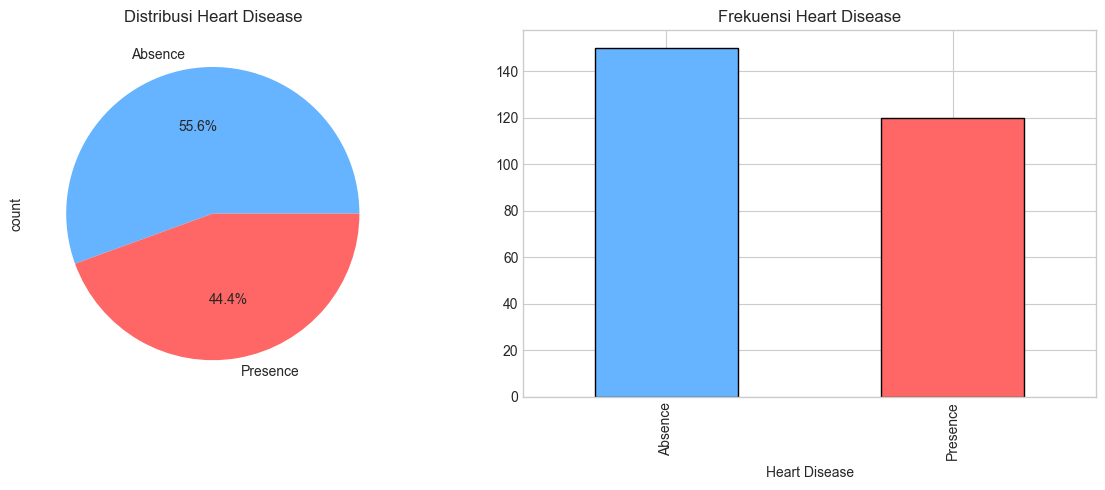

In [6]:
# 4.4 Distribusi Target Variable
print("="*60)
print("4.4 DISTRIBUSI TARGET VARIABLE")
print("="*60)
print(df['Heart Disease'].value_counts())
print(f"\nPersentase:")
print(df['Heart Disease'].value_counts(normalize=True) * 100)

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
colors = ['#66b3ff', '#ff6666']
df['Heart Disease'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0], colors=colors)
axes[0].set_title('Distribusi Heart Disease')
df['Heart Disease'].value_counts().plot(kind='bar', ax=axes[1], color=colors, edgecolor='black')
axes[1].set_title('Frekuensi Heart Disease')
plt.tight_layout()
plt.show()

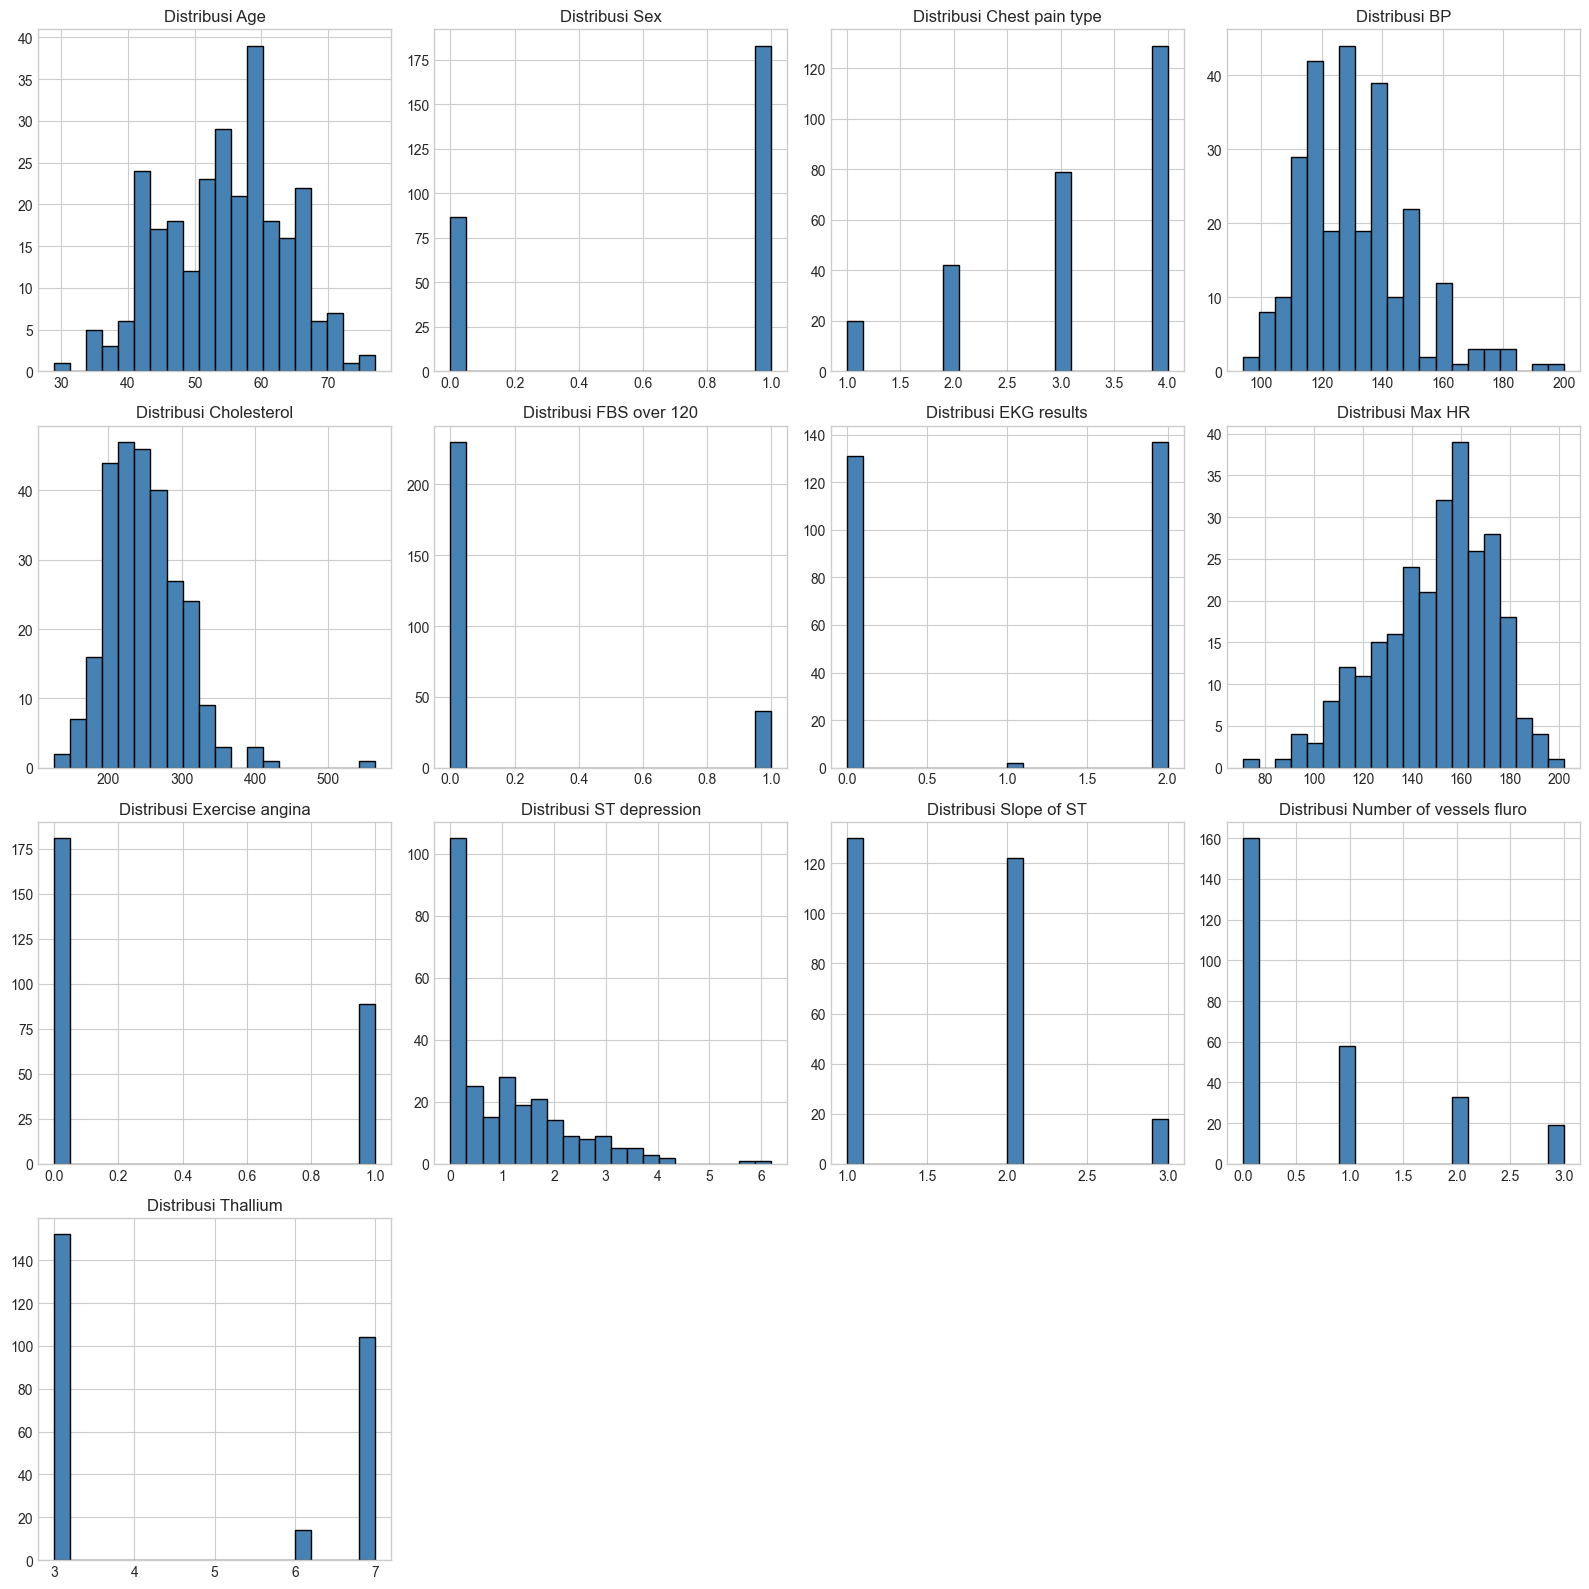

In [7]:
# 4.5 Histogram Fitur Numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
n_cols, n_rows = 4, (len(numeric_cols) + 3) // 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    df[col].hist(bins=20, ax=axes[i], color='steelblue', edgecolor='black')
    axes[i].set_title(f'Distribusi {col}')
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

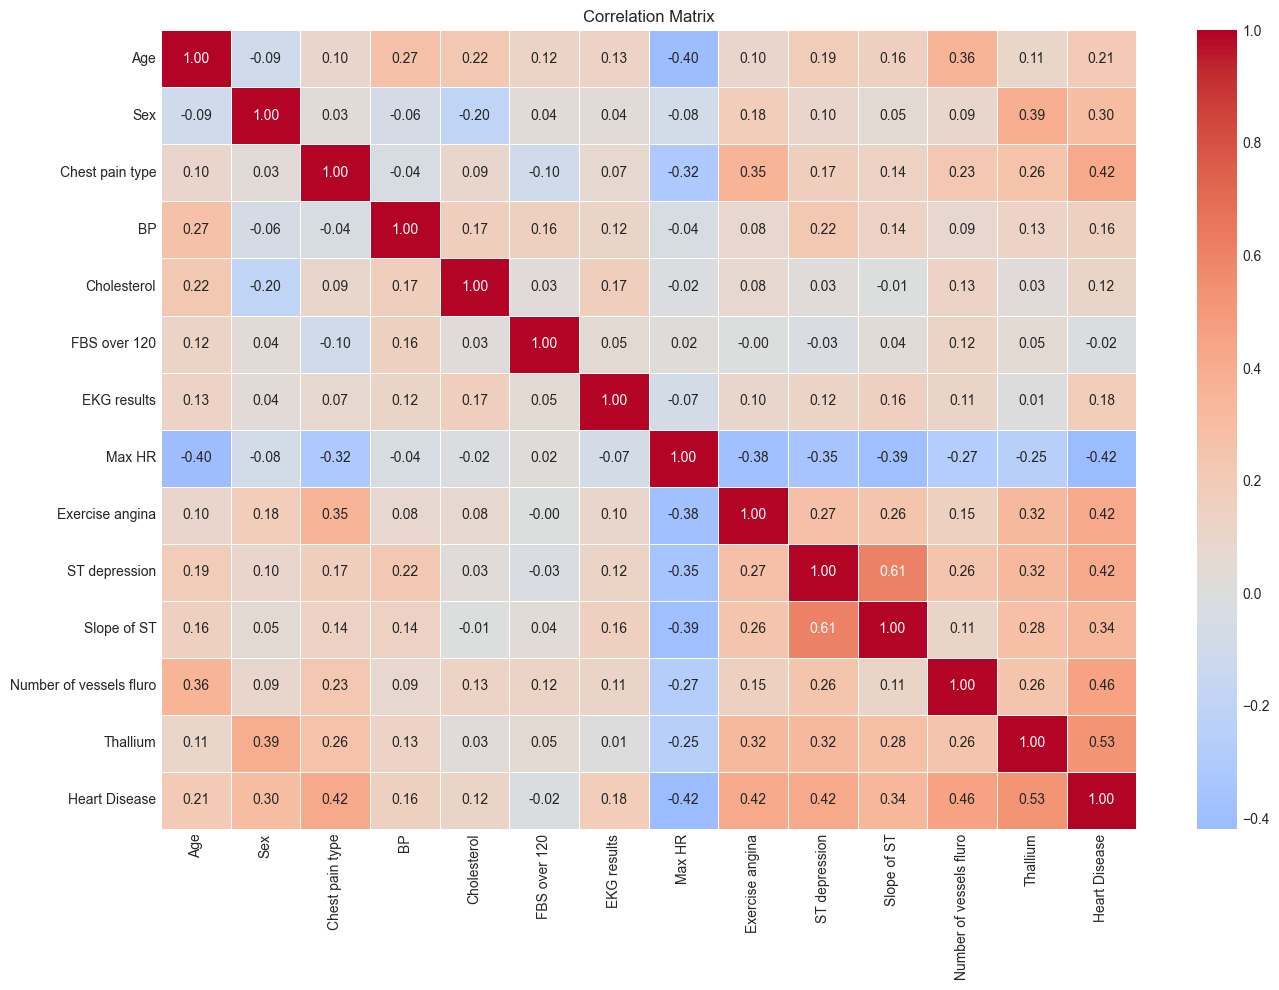

In [8]:
# 4.6 Correlation Matrix
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['Heart Disease'] = le.fit_transform(df['Heart Disease'])

plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

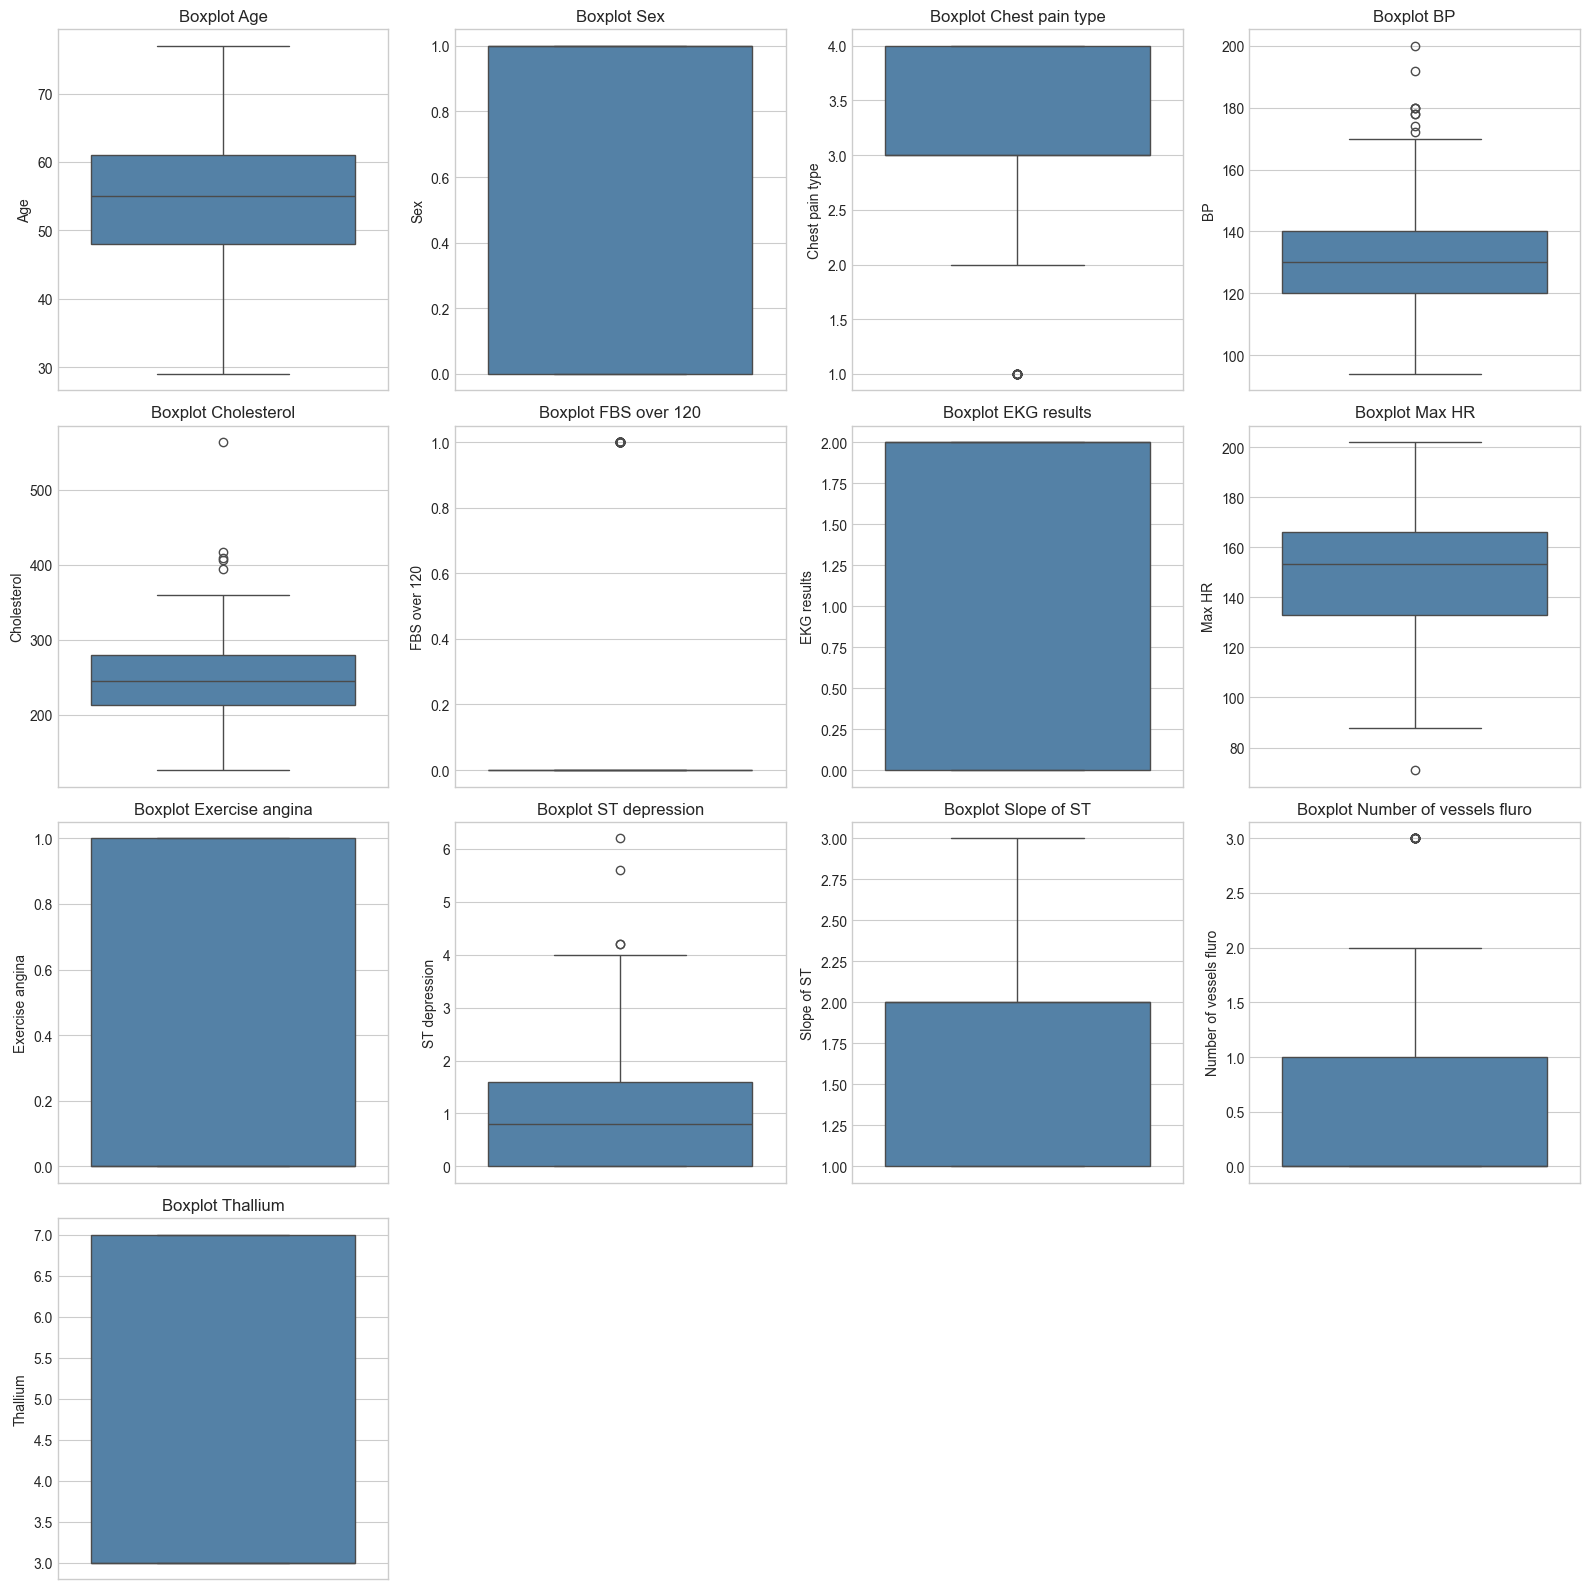

In [9]:
# 4.7 Boxplot Deteksi Outlier
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Boxplot {col}')
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
# 5.1 Menangani Missing Values
print("="*60)
print("5.1 MENANGANI MISSING VALUES")
print("="*60)

if df.isnull().sum().sum() > 0:
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    print("Missing values ditangani dengan median.")
else:
    print("Tidak ada missing values.")

# 5.2 Menghapus Duplikat
print("\n" + "="*60)
print("5.2 MENGHAPUS DUPLIKAT")
print("="*60)

dup_count = df.duplicated().sum()
if dup_count > 0:
    df.drop_duplicates(inplace=True)
    df.reset_index(drop=True, inplace=True)
    print(f"Menghapus {dup_count} baris duplikat.")
else:
    print("Tidak ada duplikat.")

5.1 MENANGANI MISSING VALUES
Tidak ada missing values.

5.2 MENGHAPUS DUPLIKAT
Tidak ada duplikat.


In [11]:
# 5.3 Penanganan Outlier (IQR Capping)
print("="*60)
print("5.3 PENANGANAN OUTLIER (IQR Capping)")
print("="*60)

def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = ((data[column] < lower) | (data[column] > upper)).sum()
    if outliers > 0:
        data[column] = np.clip(data[column], lower, upper)
        print(f"  - {column}: {outliers} outliers di-capping")
    return data

for col in numeric_cols:
    df = handle_outliers_iqr(df, col)

5.3 PENANGANAN OUTLIER (IQR Capping)
  - Chest pain type: 20 outliers di-capping
  - BP: 9 outliers di-capping
  - Cholesterol: 5 outliers di-capping
  - FBS over 120: 40 outliers di-capping
  - Max HR: 1 outliers di-capping
  - ST depression: 4 outliers di-capping
  - Number of vessels fluro: 19 outliers di-capping


In [12]:
# 5.4 Encoding Kategorikal
print("="*60)
print("5.4 ENCODING KATEGORIKAL")
print("="*60)

le_target = LabelEncoder()
df['Heart Disease'] = le_target.fit_transform(df['Heart Disease'])
print(f"Heart Disease encoded: {dict(zip(le_target.classes_, [0, 1]))}")

5.4 ENCODING KATEGORIKAL
Heart Disease encoded: {'Absence': 0, 'Presence': 1}


In [13]:
# 5.5 Normalisasi (StandardScaler)
print("="*60)
print("5.5 NORMALISASI (StandardScaler)")
print("="*60)

X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print(f"Shape X: {X_scaled.shape}")
print(f"Shape y: {y.shape}")
print("\nStatistik setelah scaling (mean ~ 0, std ~ 1):")
print(X_scaled.describe().loc[['mean', 'std']])

5.5 NORMALISASI (StandardScaler)
Shape X: (270, 13)
Shape y: (270,)

Statistik setelah scaling (mean ~ 0, std ~ 1):
               Age           Sex  Chest pain type            BP   Cholesterol  \
mean  3.667848e-16  6.579099e-18    -1.266477e-16  2.483610e-16  2.631640e-16   
std   1.001857e+00  1.001857e+00     1.001857e+00  1.001857e+00  1.001857e+00   

      FBS over 120   EKG results        Max HR  Exercise angina  \
mean           0.0  3.125072e-17 -3.157968e-16     7.894919e-17   
std            0.0  1.001857e+00  1.001857e+00     1.001857e+00   

      ST depression   Slope of ST  Number of vessels fluro      Thallium  
mean  -3.947460e-17 -1.064992e-16            -1.315820e-17  8.552829e-17  
std    1.001857e+00  1.001857e+00             1.001857e+00  1.001857e+00  


In [14]:
# 5.6 Train-Test Split
print("="*60)
print("5.6 TRAIN-TEST SPLIT")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.0f}%)")
print(f"\nDistribusi target - Train: {dict(pd.Series(y_train).value_counts())}")
print(f"Distribusi target - Test: {dict(pd.Series(y_test).value_counts())}")

5.6 TRAIN-TEST SPLIT
Training set: 216 samples (80%)
Test set: 54 samples (20%)

Distribusi target - Train: {0: 120, 1: 96}
Distribusi target - Test: {0: 30, 1: 24}


In [15]:
# 5.7 Simpan Data Siap Latih
print("="*60)
print("5.7 SIMPAN DATA SIAP LATIH")
print("="*60)

output_dir = 'dataset_preprocessing'
os.makedirs(output_dir, exist_ok=True)

# Gabungkan X dan y untuk disimpan
train_data = X_train.copy()
train_data['Heart Disease'] = y_train.values

test_data = X_test.copy()
test_data['Heart Disease'] = y_test.values

# Simpan ke CSV
train_data.to_csv(f'{output_dir}/train_data.csv', index=False)
test_data.to_csv(f'{output_dir}/test_data.csv', index=False)

print(f"✅ train_data.csv disimpan ({train_data.shape[0]} baris)")
print(f"✅ test_data.csv disimpan ({test_data.shape[0]} baris)")
print(f"\nLokasi: {output_dir}/")
print("\n" + "="*60)
print("PREPROCESSING SELESAI!")
print("="*60)

5.7 SIMPAN DATA SIAP LATIH
✅ train_data.csv disimpan (216 baris)
✅ test_data.csv disimpan (54 baris)

Lokasi: dataset_preprocessing/

PREPROCESSING SELESAI!
